<a href="https://colab.research.google.com/github/yasmiinalii7/Asthma-Machine-Learning/blob/main/Asthma_Risk_%26_Severity_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # pip install imbalanced-learn
# !pip install ydata-profiling

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt                                                                      # Visualization
import seaborn as sns

from ydata_profiling import ProfileReport                                                           # !pip install ydata-profiling

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, PolynomialFeatures     # Preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE                                                            # To handle class imbalance

from scipy import stats

from sklearn.linear_model import LogisticRegression                                                  # Machine learning models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from keras.models import Sequential                                                                  # ANN
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix                  # Evaluation

import joblib                                                                                        # Save and load

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/synthetic_asthma_dataset.csv')

In [ ]:
df.head()

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN


### Understand the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               10000 non-null  object 
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   BMI                      10000 non-null  float64
 4   Smoking_Status           10000 non-null  object 
 5   Family_History           10000 non-null  int64  
 6   Allergies                7064 non-null   object 
 7   Air_Pollution_Level      10000 non-null  object 
 8   Physical_Activity_Level  10000 non-null  object 
 9   Occupation_Type          10000 non-null  object 
 10  Comorbidities            5033 non-null   object 
 11  Medication_Adherence     10000 non-null  float64
 12  Number_of_ER_Visits      10000 non-null  int64  
 13  Peak_Expiratory_Flow     10000 non-null  float64
 14  FeNO_Level             

In [ ]:
df.shape

(10000, 17)

### Missing Values

In [ ]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
BMI,0
Smoking_Status,0
Family_History,0
Allergies,2936
Air_Pollution_Level,0
Physical_Activity_Level,0
Occupation_Type,0


In [ ]:
df.drop('Patient_ID',axis=1,inplace=True)

In [ ]:
df['Allergies'].fillna(df['Allergies'].mode()[0],inplace=True)

In [ ]:
df.drop('Asthma_Control_Level',axis=1,inplace=True)

In [ ]:
df.drop('Comorbidities',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
BMI,0
Smoking_Status,0
Family_History,0
Allergies,0
Air_Pollution_Level,0
Physical_Activity_Level,0
Occupation_Type,0
Medication_Adherence,0


# YData profiling

In [ ]:
profile=ProfileReport(df)
profile.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 19.44it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Visualize the Data

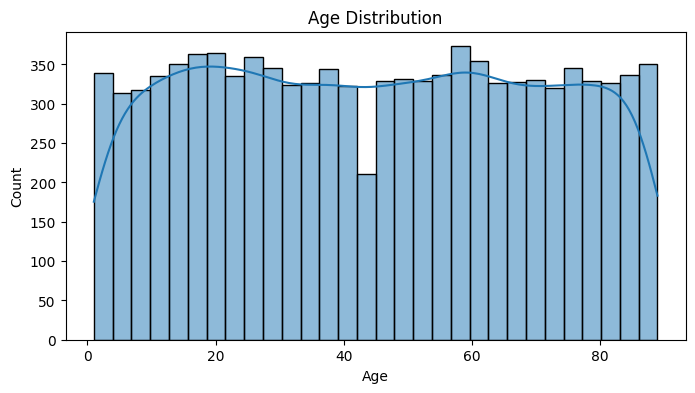

In [ ]:
# Age Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

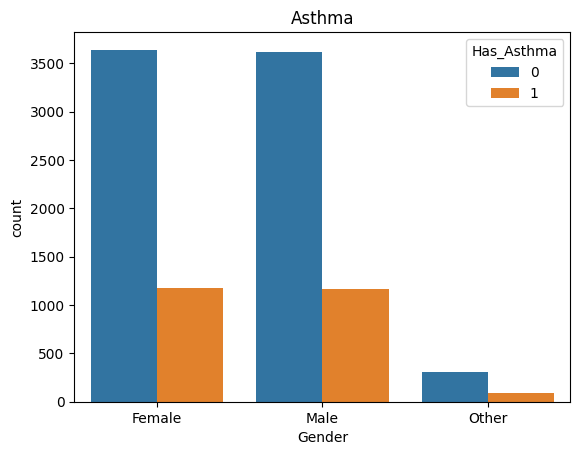

In [ ]:
sns.countplot(x='Gender', hue='Has_Asthma', data=df)
plt.title('Asthma')
plt.show()

<Axes: xlabel='Has_Asthma', ylabel='Count'>

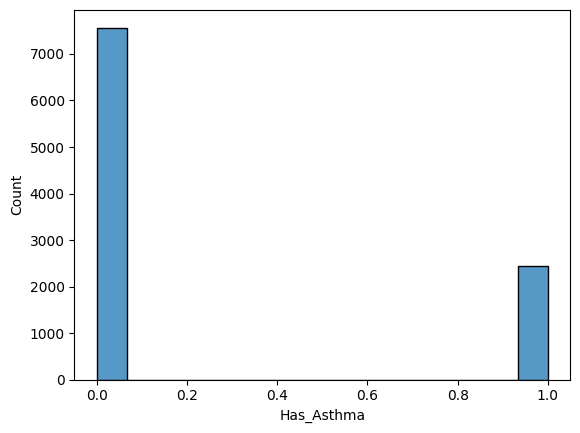

In [ ]:
sns.histplot(df['Has_Asthma'])

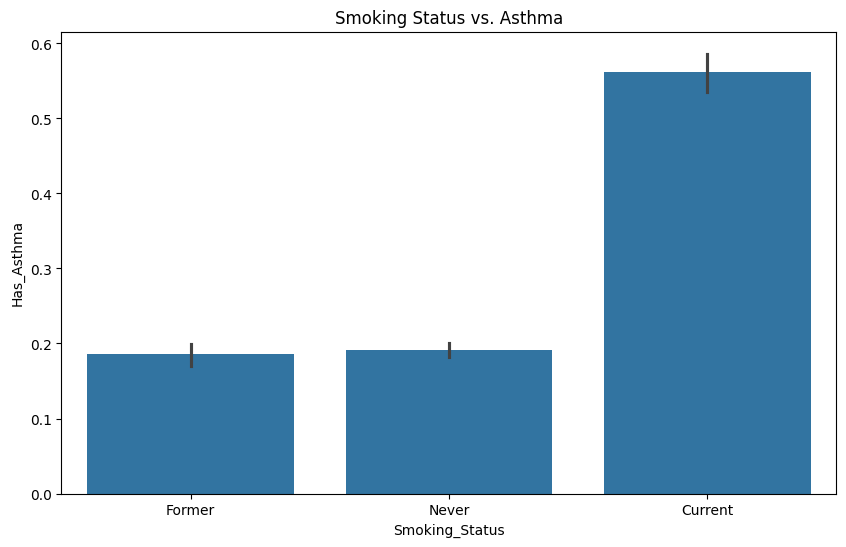

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Smoking_Status', y='Has_Asthma', data=df)
plt.title('Smoking Status vs. Asthma')
plt.show()

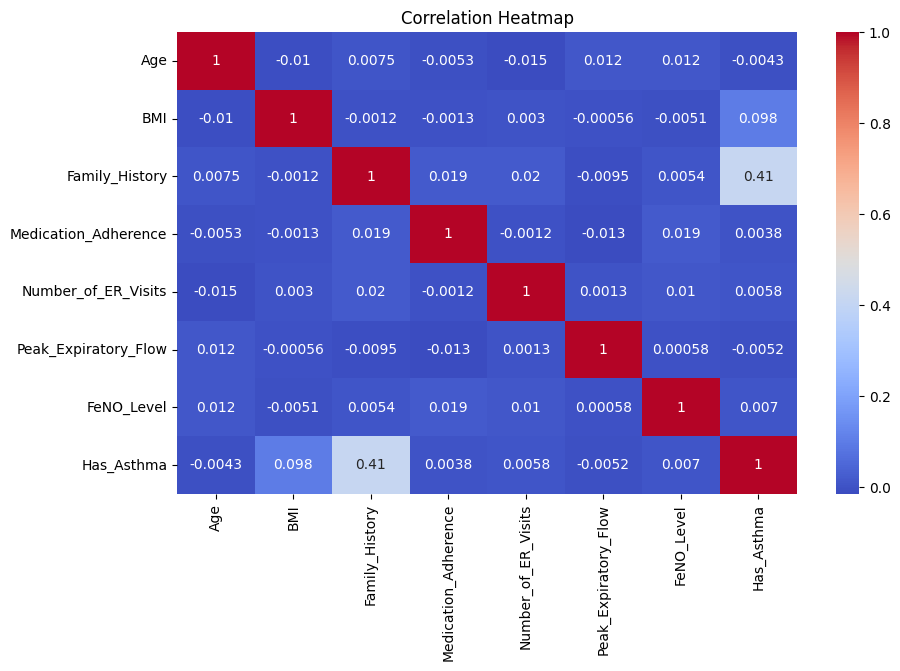

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

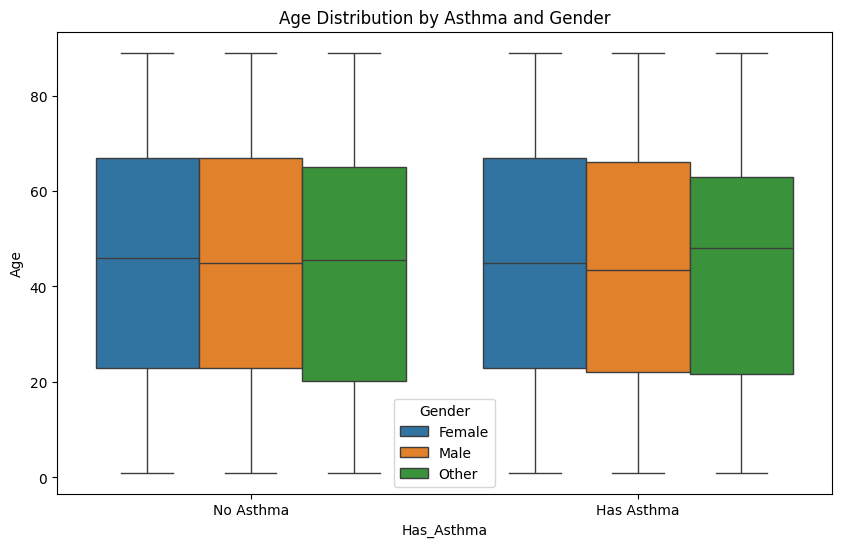

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Has_Asthma', y='Age', hue='Gender', data=df)
plt.title('Age Distribution by Asthma and Gender')
plt.xticks([0, 1], ['No Asthma', 'Has Asthma'])
plt.show()

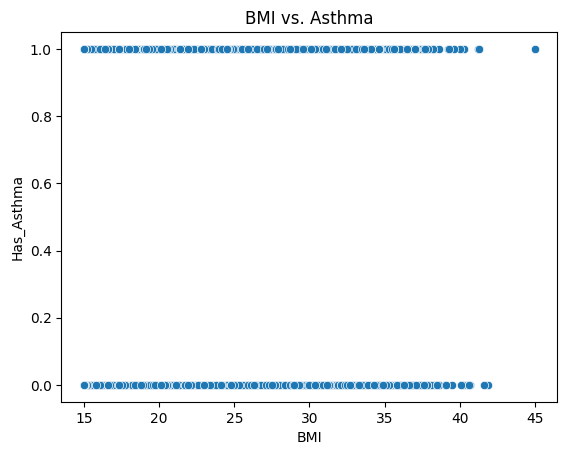

In [ ]:
sns.scatterplot(x='BMI', y='Has_Asthma', data=df)
plt.title('BMI vs. Asthma')
plt.show()

### Handling Outliers

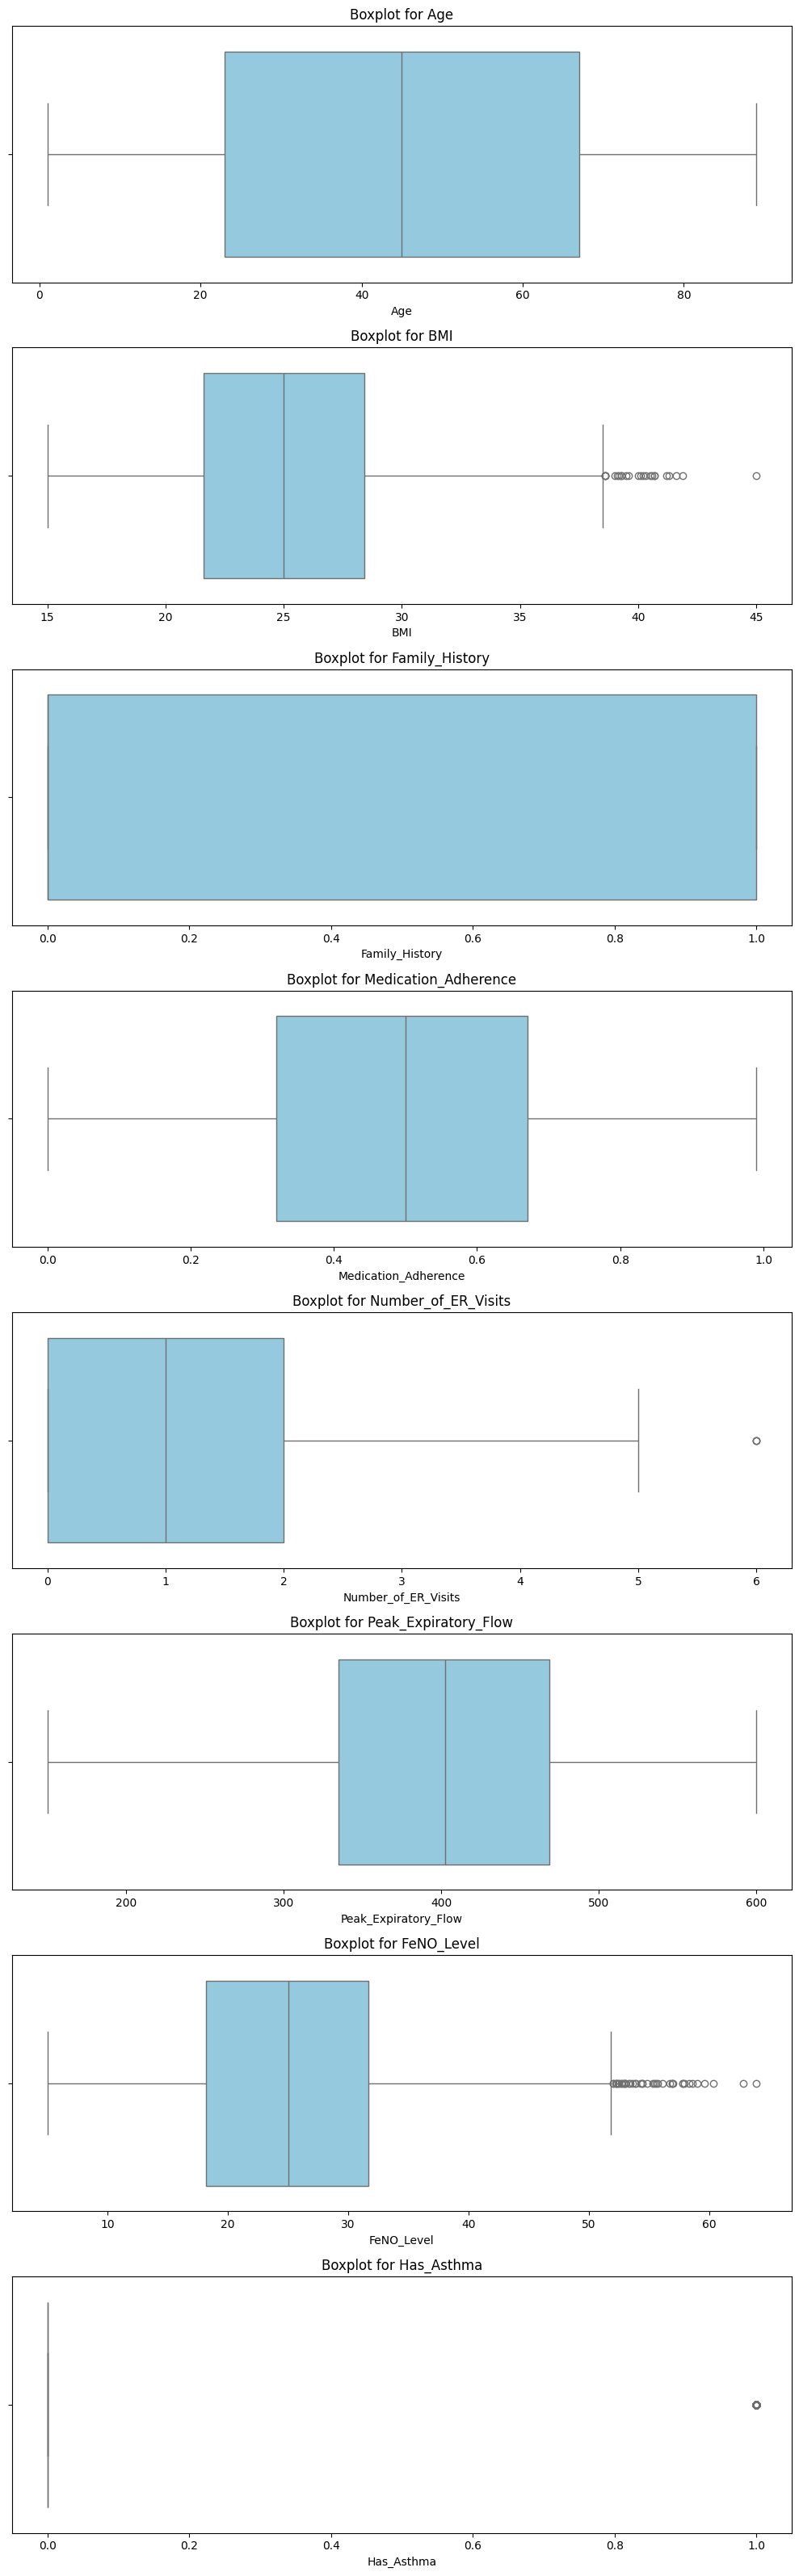

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, len(numeric_cols)*4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()

plt.show()

In [ ]:
# List of features to clean
features = ['BMI', 'Number_of_ER_Visits', 'FeNO_Level']

for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #  show how many outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} → Outliers: {len(outliers)}")

    # Handling: remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


BMI → Outliers: 24
Number_of_ER_Visits → Outliers: 3
FeNO_Level → Outliers: 41


# Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9932 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      9932 non-null   int64  
 1   Gender                   9932 non-null   object 
 2   BMI                      9932 non-null   float64
 3   Smoking_Status           9932 non-null   object 
 4   Family_History           9932 non-null   int64  
 5   Allergies                9932 non-null   object 
 6   Air_Pollution_Level      9932 non-null   object 
 7   Physical_Activity_Level  9932 non-null   object 
 8   Occupation_Type          9932 non-null   object 
 9   Medication_Adherence     9932 non-null   float64
 10  Number_of_ER_Visits      9932 non-null   int64  
 11  Peak_Expiratory_Flow     9932 non-null   float64
 12  FeNO_Level               9932 non-null   float64
 13  Has_Asthma               9932 non-null   int64  
dtypes: float64(4), int64(4), obje

In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())

Unique values in column 'Gender':
['Female' 'Male' 'Other']
Unique values in column 'Smoking_Status':
['Former' 'Never' 'Current']
Unique values in column 'Allergies':
['Dust' 'Multiple' 'Pollen' 'Pets']
Unique values in column 'Air_Pollution_Level':
['Moderate' 'Low' 'High']
Unique values in column 'Physical_Activity_Level':
['Sedentary' 'Moderate' 'Active']
Unique values in column 'Occupation_Type':
['Outdoor' 'Indoor']


In [ ]:
df['Gender']=df['Gender'].map({'Female':1,'Male':0, 'Other':2})

In [ ]:
df['Smoking_Status']=df['Smoking_Status'].map({'Current':0,'Former':1,'Never':2})
df['Occupation_Type']=df['Occupation_Type'].map({'Outdoor':0,'Indoor':1})

In [ ]:
le=LabelEncoder()
df['Allergies']=le.fit_transform(df['Allergies'])
df['Physical_Activity_Level']=le.fit_transform(df['Physical_Activity_Level'])
df['Air_Pollution_Level']=le.fit_transform(df['Air_Pollution_Level'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9932 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      9932 non-null   int64  
 1   Gender                   9932 non-null   int64  
 2   BMI                      9932 non-null   float64
 3   Smoking_Status           9932 non-null   int64  
 4   Family_History           9932 non-null   int64  
 5   Allergies                9932 non-null   int64  
 6   Air_Pollution_Level      9932 non-null   int64  
 7   Physical_Activity_Level  9932 non-null   int64  
 8   Occupation_Type          9932 non-null   int64  
 9   Medication_Adherence     9932 non-null   float64
 10  Number_of_ER_Visits      9932 non-null   int64  
 11  Peak_Expiratory_Flow     9932 non-null   float64
 12  FeNO_Level               9932 non-null   float64
 13  Has_Asthma               9932 non-null   int64  
dtypes: float64(4), int64(10)
memo

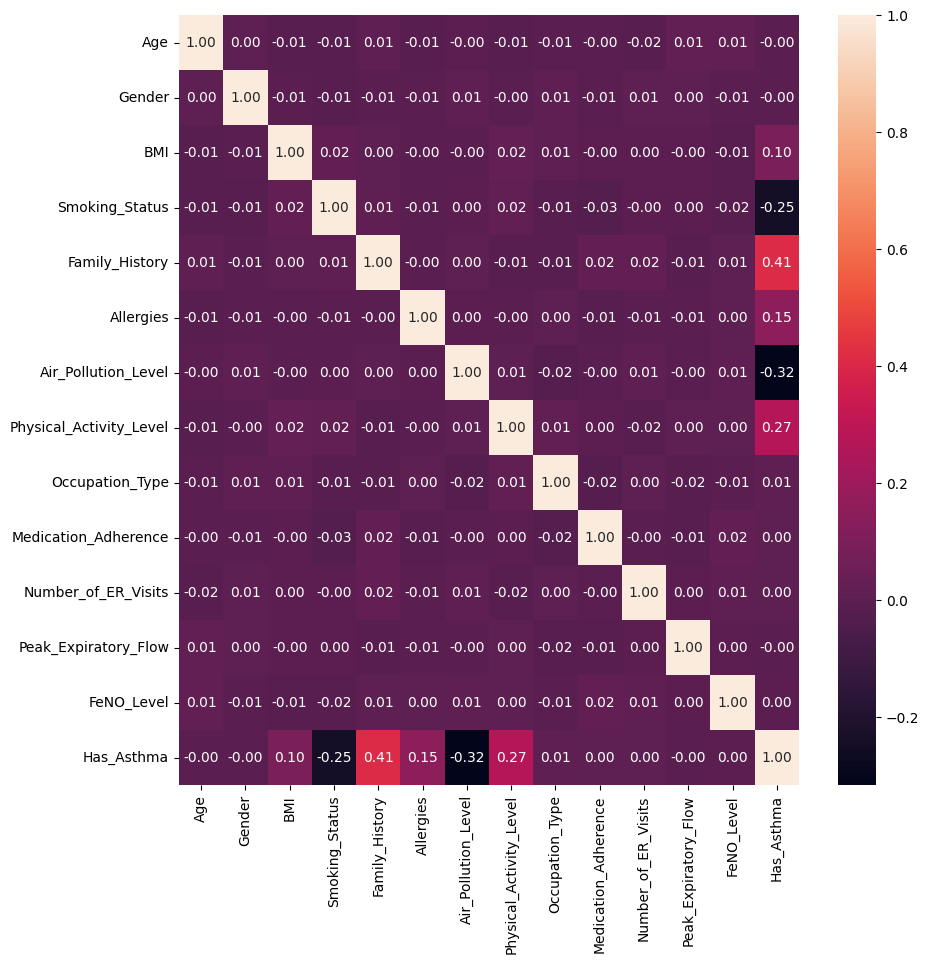

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

In [ ]:
x=df.drop('Has_Asthma',axis=1)
y=df['Has_Asthma']

In [ ]:
st=StandardScaler()
x=st.fit_transform(x)

In [ ]:
smote=SMOTE()
x,y=smote.fit_resample(x,y)

## Feature Expansion

In [ ]:
poly=PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

## Dimensionality reduction

In [ ]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

In [ ]:
df_pca = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2'])            # dataframe to draw
df_pca['Has_Asthma'] = y.values

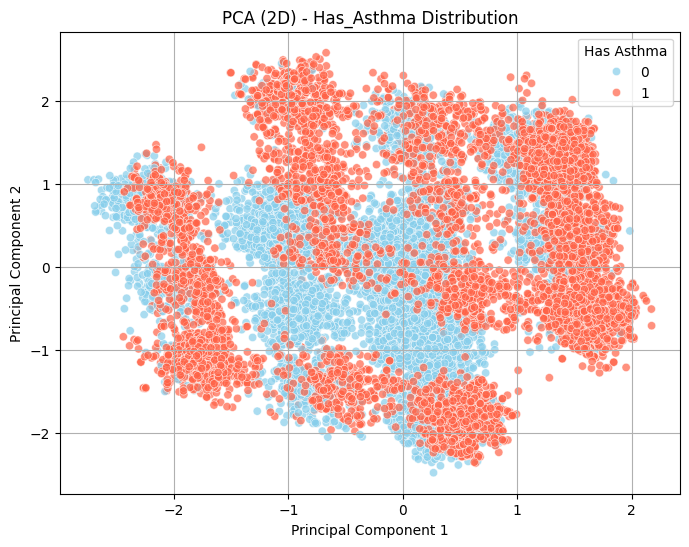

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='Has_Asthma',
    palette=['skyblue', 'tomato'],
    alpha=0.7
)
plt.title('PCA (2D) - Has_Asthma Distribution')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Has Asthma')
plt.grid(True)
plt.show()

# Data Splitting

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.2,random_state=42 , stratify=y)

### Random Forest

In [ ]:
rf=RandomForestClassifier(n_estimators=1000, random_state=42 , max_depth=20 , class_weight='balanced')

In [ ]:
rf.fit(x_train, y_train)
y_pred_rf=rf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_rf)

0.9601461308535371

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1506
           1       0.93      0.99      0.96      1505

    accuracy                           0.96      3011
   macro avg       0.96      0.96      0.96      3011
weighted avg       0.96      0.96      0.96      3011



<Axes: >

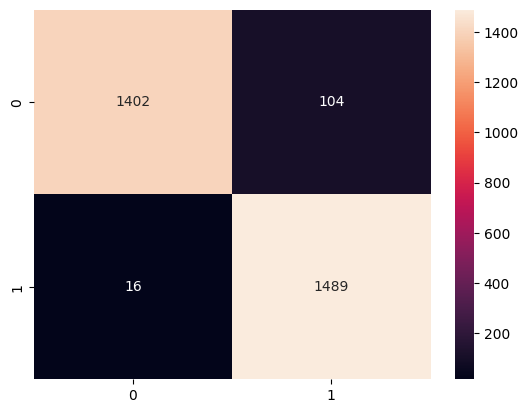

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt="d")

In [ ]:
importances=rf.feature_importances_
importances

array([0.        , 0.00207107, 0.00110776, 0.01445397, 0.03145777,
       0.05455574, 0.01150604, 0.05172428, 0.0449552 , 0.00120464,
       0.00207379, 0.00323649, 0.00202716, 0.00222222, 0.0020958 ,
       0.00230853, 0.00267965, 0.00462074, 0.0035261 , 0.00222203,
       0.00319846, 0.00297727, 0.00225626, 0.00236852, 0.00212003,
       0.00238921, 0.00250808, 0.00154003, 0.00408099, 0.00643617,
       0.0103128 , 0.00215711, 0.00918314, 0.00526723, 0.00114047,
       0.00219145, 0.00164834, 0.00228976, 0.00258413, 0.00533566,
       0.01071172, 0.02207526, 0.00564017, 0.01003558, 0.00983878,
       0.00531344, 0.00271354, 0.00339752, 0.00289704, 0.00231864,
       0.03235813, 0.03883501, 0.01379626, 0.0276947 , 0.03040197,
       0.0149881 , 0.00321303, 0.00304045, 0.00261854, 0.00361991,
       0.05135805, 0.02734801, 0.04607095, 0.07546239, 0.00562188,
       0.00269584, 0.0043468 , 0.00217414, 0.00286318, 0.00339503,
       0.01784992, 0.01363003, 0.00269435, 0.00208992, 0.00220

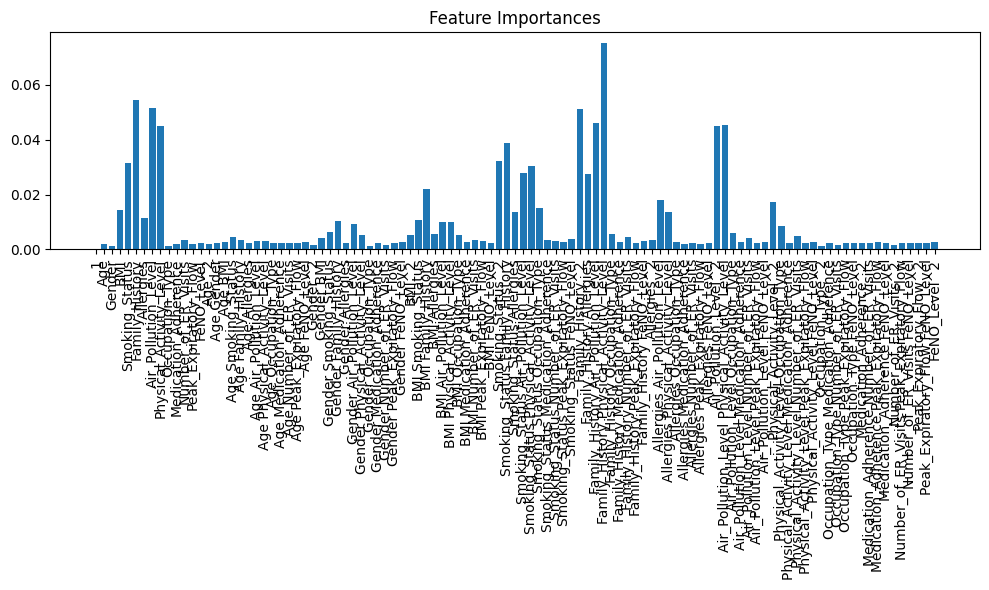

In [ ]:
feature_names=poly.get_feature_names_out(df.drop('Has_Asthma', axis=1).columns)
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances)
plt.xticks(rotation=90)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

### Support Vector Machine

In [ ]:
svc=SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced')

In [ ]:
svc.fit(x_train,y_train)

SVC(class_weight='balanced')

In [ ]:
y_pred_svc=svc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_svc)

0.9471936233809366

In [ ]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1506
           1       0.91      0.99      0.95      1505

    accuracy                           0.95      3011
   macro avg       0.95      0.95      0.95      3011
weighted avg       0.95      0.95      0.95      3011



# Decision Tree

In [ ]:
dt=DecisionTreeClassifier(class_weight='balanced')

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [ ]:
y_pred_dt=dt.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_dt)

0.9452009299236134

In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1506
           1       0.94      0.95      0.95      1505

    accuracy                           0.95      3011
   macro avg       0.95      0.95      0.95      3011
weighted avg       0.95      0.95      0.95      3011



### Logistic Regression

In [ ]:
lr=LogisticRegression(class_weight='balanced')

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
y_pred_lr=lr.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_lr)

0.9322484224510129

In [ ]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1506
           1       0.91      0.95      0.93      1505

    accuracy                           0.93      3011
   macro avg       0.93      0.93      0.93      3011
weighted avg       0.93      0.93      0.93      3011



# KNN

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn=knn.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_knn)

0.9229491863168383

In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1506
           1       0.88      0.98      0.93      1505

    accuracy                           0.92      3011
   macro avg       0.93      0.92      0.92      3011
weighted avg       0.93      0.92      0.92      3011



# Naive Bayes

In [ ]:
nb=GaussianNB()

In [ ]:
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred_nb=nb.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_nb)

0.8625041514447027

In [ ]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1506
           1       0.83      0.90      0.87      1505

    accuracy                           0.86      3011
   macro avg       0.87      0.86      0.86      3011
weighted avg       0.87      0.86      0.86      3011



# ADABOOST

In [ ]:
base = DecisionTreeClassifier(max_depth=1)

In [ ]:
ada_model = AdaBoostClassifier(estimator=base, n_estimators=100, random_state=42)

In [ ]:
ada_model.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

In [ ]:
y_pred_ada = ada_model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_ada)

0.9488542012620392

In [ ]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1506
           1       0.94      0.96      0.95      1505

    accuracy                           0.95      3011
   macro avg       0.95      0.95      0.95      3011
weighted avg       0.95      0.95      0.95      3011



# Neural Network (ANN)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7311 - loss: 0.5163 - val_accuracy: 0.9199 - val_loss: 0.1925
Epoch 2/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9301 - loss: 0.1728 - val_accuracy: 0.9348 - val_loss: 0.1489
Epoch 3/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9494 - loss: 0.1250 - val_accuracy: 0.9406 - val_loss: 0.1410
Epoch 4/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9555 - loss: 0.1060 - val_accuracy: 0.9431 - val_loss: 0.1274
Epoch 5/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9659 - loss: 0.0837 - val_accuracy: 0.9518 - val_loss: 0.1136
Epoch 6/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9732 - loss: 0.0746 - val_accuracy: 0.9548 - val_loss: 0.1173
Epoch 7/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9749 - loss: 0.0614 - val_accuracy: 0.9543 - val_loss: 0.1290
Epoch 8/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9798 - loss: 0.0556 - val_accuracy: 0.

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Total Accuracy on Test Data: {accuracy:.2f}")

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9481 - loss: 0.1566
Total Accuracy on Test Data: 0.95


<function matplotlib.pyplot.show(close=None, block=None)>

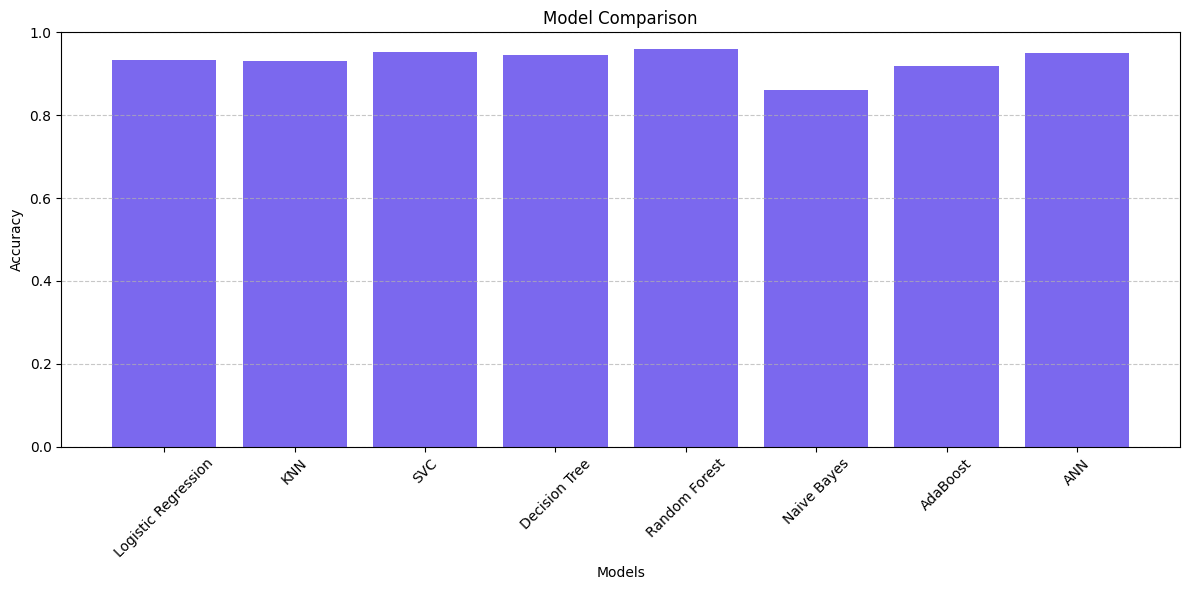

In [ ]:
model_names = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest',
               'Naive Bayes', 'AdaBoost', 'ANN']

accuracies = [0.932912653603454, 0.9309199601461309, 0.9521753570242444, 0.9458651610760545, 0.9598140152773165, 0.8605114579873796, 0.9176353370973098, 0.95]

# نرسم الـ Bar Plot
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color='mediumslateblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show

# Save the best model

In [ ]:
joblib.dump(rf, 'rf.pkl')

['rf.pkl']